In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

C:\Users\Ruchi\AppData\Local\Temp\ipykernel_6920\1894043899.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("titanic_toy_CAA.csv")
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [4]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [5]:
 df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [6]:
df['Age'].mean()

29.69911764705882

In [7]:
df['Age'].median()

28.0

In [8]:
df['Fare'].mean()

32.279338297872336

In [9]:
df['Fare'].median()

14.4542

In [10]:
x = df.drop('Survived',axis=1)
x

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,0
888,NaN,23.4500,3
889,26.0,NaN,0


In [11]:
y = df['Survived']
y


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [13]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [14]:
x_train.isnull().sum()

Age       148
Fare       36
Family      0
dtype: int64

In [15]:
x_test.isnull().sum()

Age       29
Fare       9
Family     0
dtype: int64

In [16]:
age_mean = x_train['Age'].mean()
age_median = x_train['Age'].median()

fare_mean = x_train['Fare'].mean()
fare_median = x_train['Fare'].median()

In [17]:
x_train['Age_mean'] = x_train['Age'].fillna(age_mean)
x_train['Age_median'] = x_train['Age'].fillna(age_median)
x_train['fare_mean'] = x_train['Fare'].fillna(fare_mean)
x_train['fare_median'] = x_train['Fare'].fillna(fare_median)
x_train

,Age,Fare,Family,Age_mean,Age_median,fare_mean,fare_median
30,40.0,27.7208,0,40.000000,40.00,27.7208,27.7208
10,4.0,16.7000,2,4.000000,4.00,16.7000,16.7000
873,47.0,9.0000,0,47.000000,47.00,9.0000,9.0000
182,9.0,31.3875,6,9.000000,9.00,31.3875,31.3875
876,20.0,9.8458,0,20.000000,20.00,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.00,8.6625,8.6625
584,NaN,8.7125,0,29.785904,28.75,8.7125,8.7125
493,71.0,49.5042,0,71.000000,71.00,49.5042,49.5042
527,NaN,221.7792,0,29.785904,28.75,221.7792,221.7792


In [18]:
x_train.cov()   #cov is covarient

,Age,Fare,Family,Age_mean,Age_median,fare_mean,fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [19]:
x_train.corr()   #corr is correlation

,Age,Fare,Family,Age_mean,Age_median,fare_mean,fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1fcda0c75d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fcda0d5150>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fca84cb810>,
 'medians': [<matplotlib.lines.Line2D at 0x1fcda0d6890>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fcda0d7310>,
 'means': []}

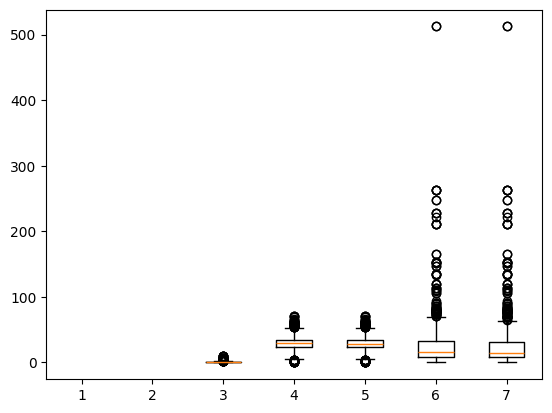

In [20]:
plt.boxplot(x_train)

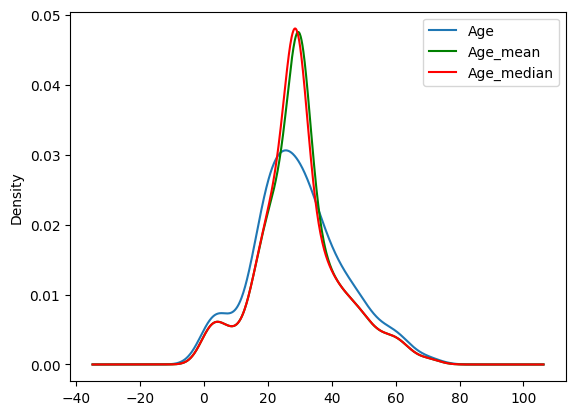

In [21]:
fig=plt.figure()
ax = fig.add_subplot(111)

x_train['Age'].plot(kind='kde',ax=ax)
x_train['Age_mean'].plot(kind='kde',ax=ax,color='green')
x_train['Age_median'].plot(kind='kde',ax=ax,color='red')
plt.legend()


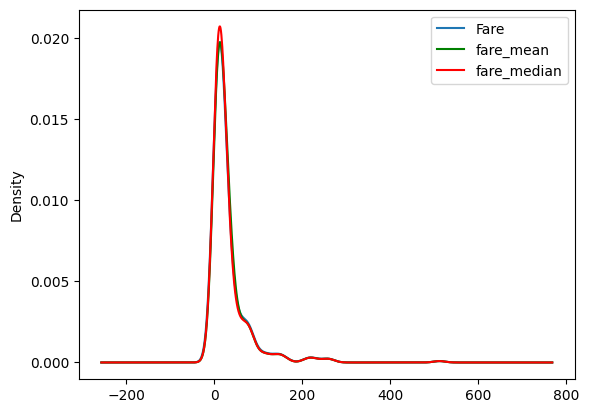

In [22]:
fig=plt.figure()
ax = fig.add_subplot(111)

x_train['Fare'].plot(kind='kde',ax=ax)
x_train['fare_mean'].plot(kind='kde',ax=ax,color='green')
x_train['fare_median'].plot(kind='kde',ax=ax,color='red')
plt.legend()

<Axes: >

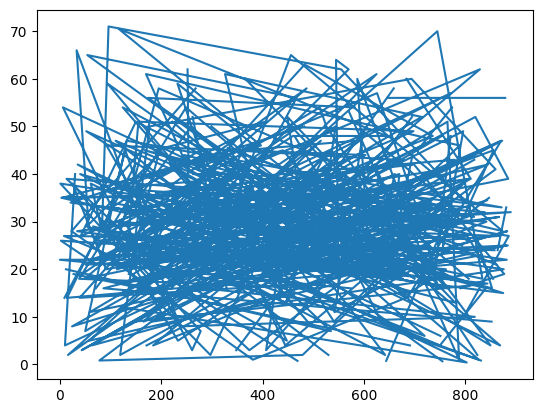

In [23]:
fig=plt.figure()
ax = fig.add_subplot(111)  #111 is position as in 1 index,1column and 1 row
x_train['Age'].plot()

<Axes: >

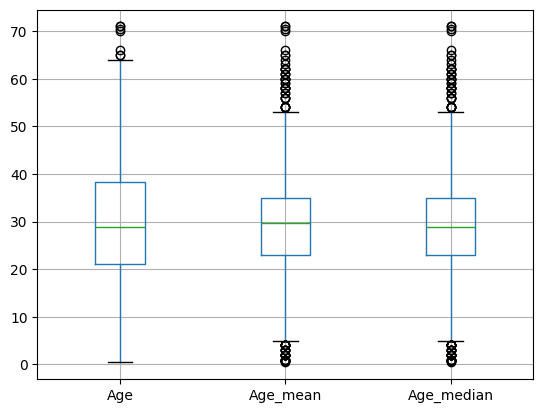

In [24]:
x_train[['Age','Age_mean','Age_median']].boxplot()

<Axes: >

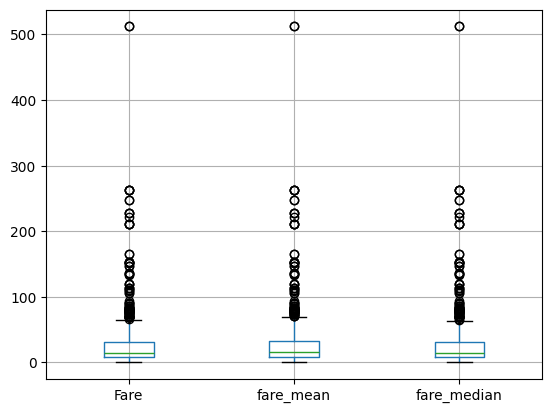

In [25]:
x_train[['Fare','fare_mean','fare_median']].boxplot()

USING SKLEARN

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
impute1 = SimpleImputer(strategy="mean")
impute2 = SimpleImputer(strategy="median")

In [28]:
trf = ColumnTransformer([('impute1',impute1,["Age"]),('impute2',impute2,["Fare"])])
trf

ColumnTransformer(transformers=[('impute1', SimpleImputer(), ['Age']),
                                ('impute2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [29]:
trf.fit(x_train)

ColumnTransformer(transformers=[('impute1', SimpleImputer(), ['Age']),
                                ('impute2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [30]:
trf.named_transformers_['impute1'].statistics_

array([29.78590426])

In [31]:
trf.named_transformers_['impute2'].statistics_

array([14.4583])

In [32]:
x_train=trf.transform(x_train)
x_train

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [33]:
x_test=trf.transform(x_test)
x_test

array([[ 42.        ,  26.2875    ],
       [ 21.        ,   8.05      ],
       [ 24.        ,  65.        ],
       [ 28.        ,  56.4958    ],
       [ 17.        ,   7.925     ],
       [ 30.        ,   7.8958    ],
       [ 80.        ,  30.        ],
       [ 25.        ,   7.25      ],
       [ 50.        , 133.65      ],
       [ 25.        ,  26.        ],
       [ 35.        ,  26.        ],
       [ 35.        ,  90.        ],
       [ 55.        ,  16.        ],
       [ 29.78590426,  56.4958    ],
       [ 29.78590426,  56.4958    ],
       [ 19.        ,   7.8542    ],
       [ 29.78590426,  15.2458    ],
       [ 49.        ,   0.        ],
       [ 18.        ,  14.4583    ],
       [ 65.        ,   7.75      ],
       [ 18.        , 108.9       ],
       [ 29.78590426,  22.3583    ],
       [ 16.        ,  18.        ],
       [ 21.        ,   9.825     ],
       [ 19.        ,   6.75      ],
       [  1.        ,  11.1333    ],
       [ 50.        ,  10.5       ],
 